In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\machine_learning\Kalvium\election_results_state.csv",encoding='latin1')
df

,state,party,won,current_lead,total_seats
0,Andhra Pradesh,Telugu Desam - TDP,16,0,16
1,Andhra Pradesh,Yuvajana Sramika Rythu Congress Party - YSRCP,4,0,4
2,Andhra Pradesh,Bharatiya Janata Party - BJP,3,0,3
3,Andhra Pradesh,Janasena Party - JnP,2,0,2
4,Arunachal Pradesh,Bharatiya Janata Party - BJP,2,0,2
...,...,...,...,...,...
90,Uttar Pradesh,Apna Dal (Soneylal) - ADAL,1,0,1
91,Uttarakhand,Bharatiya Janata Party - BJP,5,0,5
92,West Bengal,All India Trinamool Congress - AITC,29,0,29
93,West Bengal,Bharatiya Janata Party - BJP,12,0,12


In [60]:
# contribution of each state to each party
state_contribution = df.groupby(['party', 'state']).aggregate({'won': 'sum'}).sort_values(by = "state",ascending = False).reset_index()
state_contribution

,party,state,won
0,Bharatiya Janata Party - BJP,West Bengal,12
1,All India Trinamool Congress - AITC,West Bengal,29
2,Indian National Congress - INC,West Bengal,1
3,Bharatiya Janata Party - BJP,Uttarakhand,5
4,Samajwadi Party - SP,Uttar Pradesh,37
...,...,...,...
90,Bharatiya Janata Party - BJP,Arunachal Pradesh,2
91,Janasena Party - JnP,Andhra Pradesh,2
92,Telugu Desam - TDP,Andhra Pradesh,16
93,Bharatiya Janata Party - BJP,Andhra Pradesh,3


In [127]:
#parties arranged in descending order based on their no of seats won
top_party = df.groupby('party').aggregate({'won':'sum'}).sort_values(by = 'won',ascending=False)
top_party

,won
party,
Bharatiya Janata Party - BJP,239
Indian National Congress - INC,99
Samajwadi Party - SP,37
All India Trinamool Congress - AITC,29
Dravida Munnetra Kazhagam - DMK,22
Telugu Desam - TDP,16
Janata Dal (United) - JD(U),12
Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9
Nationalist Congress Party  Sharadchandra Pawar - NCPSP,8


In [85]:
#states that contributed more seats to parties
df1 = df.groupby('state').aggregate({'total_seats': 'sum'}).reset_index()
state_contribution = df.groupby(['party', 'state']).aggregate({'won': 'sum'}).sort_values(by="state", ascending=False).reset_index()
max_state_contribution = state_contribution.loc[state_contribution.groupby('party')['won'].idxmax()]
max_state_contribution = max_state_contribution.sort_values(by='won', ascending=False)
df2 = max_state_contribution.set_index('state').join(df1.set_index('state'), on='state', lsuffix='_max', rsuffix='_total')
df2.reset_index(inplace=True)
df2

,state,party,won,total_seats
0,Uttar Pradesh,Samajwadi Party - SP,37,80
1,Uttar Pradesh,Bharatiya Janata Party - BJP,33,80
2,West Bengal,All India Trinamool Congress - AITC,29,42
3,Tamil Nadu,Dravida Munnetra Kazhagam - DMK,22,39
4,Andhra Pradesh,Telugu Desam - TDP,16,25
5,Kerala,Indian National Congress - INC,14,20
6,Bihar,Janata Dal (United) - JD(U),12,40
7,Maharashtra,Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT,9,48
8,Maharashtra,Nationalist Congress Party  Sharadchandra Paw...,8,48
9,Maharashtra,Shiv Sena - SHS,7,48


In [117]:
#winning percentage of party statewise
win_percentage = state_contribution.join(df1.set_index('state'), on='state', lsuffix='_max', rsuffix='_total')
win_percentage['win_percentage'] = (win_percentage['won']/win_percentage['total_seats'])*100
win_percentage.sort_values(by = ['win_percentage'],ascending=False)

,party,state,won,total_seats,win_percentage
47,Bharatiya Janata Party - BJP,Madhya Pradesh,29,29,100.000000
77,Indian National Congress - INC,Chandigarh,1,1,100.000000
49,Independent - IND,Ladakh,1,1,100.000000
39,Indian National Congress - INC,Manipur,2,2,100.000000
36,Zoram Peoples Movement - ZPM,Mizoram,1,1,100.000000
...,...,...,...,...,...
2,Indian National Congress - INC,West Bengal,1,42,2.380952
44,Nationalist Congress Party - NCP,Maharashtra,1,48,2.083333
45,Independent - IND,Maharashtra,1,48,2.083333
6,Apna Dal (Soneylal) - ADAL,Uttar Pradesh,1,80,1.250000


In [126]:
#no of parties in each state
state_wise_party = df.groupby('state').agg(
    number_of_parties=('party', lambda x: len(x.unique())),
    parties=('party', lambda x: list(x.unique()))
).reset_index()
state_wise_party

,state,number_of_parties,parties
0,Andhra Pradesh,4,"[Telugu Desam - TDP, Yuvajana Sramika Rythu Co..."
1,Arunachal Pradesh,1,[Bharatiya Janata Party - BJP]
2,Assam,4,"[Bharatiya Janata Party - BJP, Indian National..."
3,Bihar,8,"[Janata Dal (United) - JD(U), Bharatiya Janat..."
4,Chandigarh,1,[Indian National Congress - INC]
5,Chhattisgarh,2,"[Bharatiya Janata Party - BJP, Indian National..."
6,Dadra & Nagar Haveli and Daman & Diu,2,"[Bharatiya Janata Party - BJP, Independent - IND]"
7,Goa,2,"[Bharatiya Janata Party - BJP, Indian National..."
8,Gujarat,2,"[Bharatiya Janata Party - BJP, Indian National..."
9,Haryana,2,"[Indian National Congress - INC, Bharatiya Jan..."


C:\Users\Acer\AppData\Local\Temp\ipykernel_28068\3388257735.py:12: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
C:\Users\Acer\AppData\Local\Temp\ipykernel_28068\3388257735.py:12: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


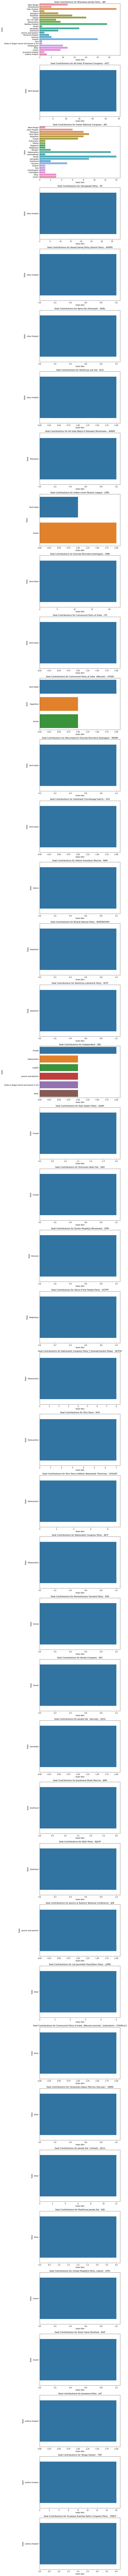

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
top_parties = state_contribution['party'].unique()
fig, axes = plt.subplots(len(top_parties), 1, figsize=(10, len(top_parties) * 5))
for i, party in enumerate(top_parties):
    party_data = state_contribution[state_contribution['party'] == party]
    sns.barplot(x='won', y='state', data=party_data, ax=axes[i])
    axes[i].set_title(f'Seat Contributions for {party}')
    axes[i].set_xlabel('Seats Won')
    axes[i].set_ylabel('State')

plt.tight_layout()
plt.show()


C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


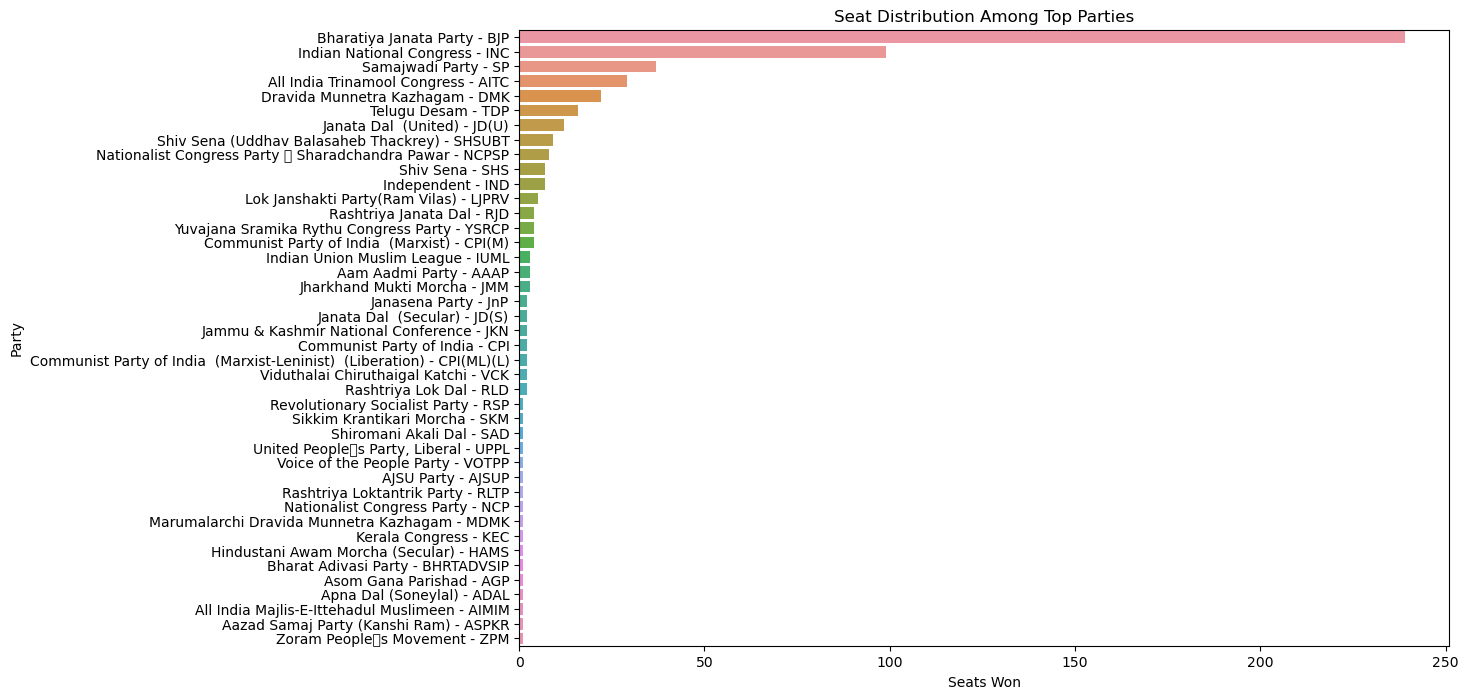

In [139]:
# seat distribution among top parties
top_party_plot = top_party.reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='won', y='party', data=top_party_plot)
plt.title('Seat Distribution Among Top Parties')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.show()


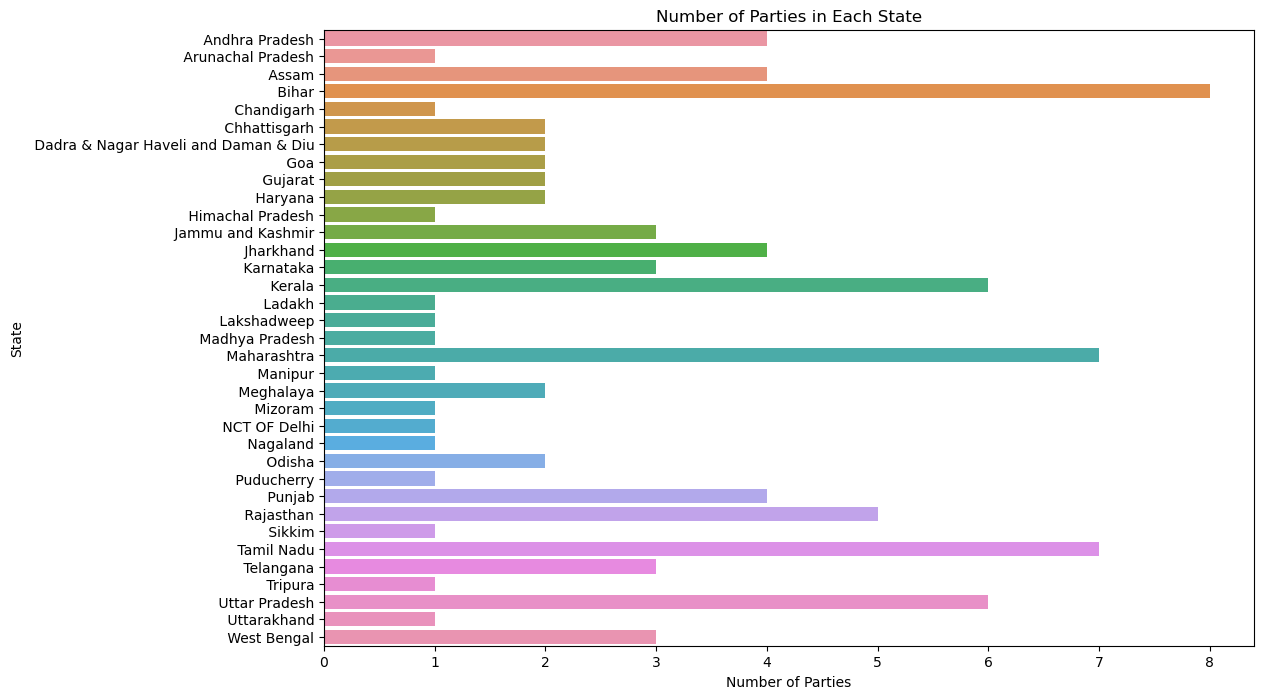

In [138]:
#number of parties in each state
plt.figure(figsize=(12, 8))
sns.barplot(x='number_of_parties', y='state', data=state_wise_party)
plt.title('Number of_Parties in Each State')
plt.xlabel('Numberof Parties')
plt.ylabel('State')
plt.show()


In [142]:

total_seats_bjp = df[df['party'] == 'Bharatiya Janata Party - BJP']['won'].sum()
total_seats_inc = df[df['party'] == 'Indian National Congress - INC']['won'].sum()
(total_seats_bjp, total_seats_inc)
#BJP WON 239 seats and INC got 99

(239, 99)

In [145]:
max_seats_state_inc = df[df['party'] == 'Indian National Congress - INC'].sort_values(by='won', ascending=False).iloc[0]
max_seats_state_inc
#INC got its highest no of seats from kerala [14]

state                                   Kerala
party           Indian National Congress - INC
won                                         14
current_lead                                 0
total_seats                                 14
Name: 39, dtype: object

In [148]:
max_seats_state_bjp = df[df['party'] == 'Bharatiya Janata Party - BJP'].sort_values(by='won', ascending=False).iloc[0]
max_seats_state_bjp
#BJP got its highest no of seats from Uttarpradesh [33]

state                          Uttar Pradesh
party           Bharatiya Janata Party - BJP
won                                       33
current_lead                               0
total_seats                               33
Name: 86, dtype: object

In [150]:
win_percentage = state_contribution.join(df1.set_index('state'), on='state', lsuffix='_max', rsuffix='_total')
win_percentage['win_percentage'] = (win_percentage['won'] / win_percentage['total_seats']) * 100
win_percentage_bjp = win_percentage[win_percentage['party'] == 'Bharatiya Janata Party - BJP']['win_percentage'].mean()
win_percentage_inc = win_percentage[win_percentage['party'] == 'Indian National Congress - INC']['win_percentage'].mean()
(win_percentage_bjp, win_percentage_inc)
# Average winning percentage for BJP[62.2] and INC[43.7]

(62.211422564363744, 43.73923029229935)

In [152]:
states_contested_bjp = df[df['party'] == 'Bharatiya Janata Party - BJP']['state'].nunique()
states_contested_inc = df[df['party'] == 'Indian National Congress - INC']['state'].nunique()
(states_contested_bjp, states_contested_inc)
# Number of states contested by BJP and INC

(24, 23)

In [155]:
# States with highest winning percentage for BJP
states_highest_win_percentage_bjp = win_percentage[win_percentage['party'] == 'Bharatiya Janata Party - BJP'].sort_values(by='win_percentage', ascending=False).head()
states_highest_win_percentage_bjp

,party,state,won,total_seats,win_percentage
47,Bharatiya Janata Party - BJP,Madhya Pradesh,29,29,100.0
10,Bharatiya Janata Party - BJP,Tripura,2,2,100.0
66,Bharatiya Janata Party - BJP,Himachal Pradesh,4,4,100.0
3,Bharatiya Janata Party - BJP,Uttarakhand,5,5,100.0
35,Bharatiya Janata Party - BJP,NCT OF Delhi,7,7,100.0


In [156]:
# States with highest winning percentage for INC
states_highest_win_percentage_inc = win_percentage[win_percentage['party'] == 'Indian National Congress - INC'].sort_values(by='win_percentage', ascending=False).head()
states_highest_win_percentage_inc


,party,state,won,total_seats,win_percentage
31,Indian National Congress - INC,Puducherry,1,1,100.0
77,Indian National Congress - INC,Chandigarh,1,1,100.0
34,Indian National Congress - INC,Nagaland,1,1,100.0
39,Indian National Congress - INC,Manipur,2,2,100.0
48,Indian National Congress - INC,Lakshadweep,1,1,100.0
